# DXF Testing

Firstly I wanted to use matplot lib in order to ensure that the points which were coming from the dxf_loader.py's load_dxf method were actually accurate


In [1]:
import matplotlib.pyplot as plt
import dxf_loader


In [3]:
#loading one of the sample dxf files with the aforementioned method
shape_points =  dxf_loader.load_dxf('samples/dxf/Square-Circle.dxf')
#Checking to make sure there's 5 seperate entities as intended
print(len(shape_points))


is my debugging printing?
CIRCLE(#10000057)

circ appended
LINE(#1000005B)

line appended
LINE(#1000005F)

line appended
LINE(#10000063)

line appended
LINE(#10000067)

line appended
5


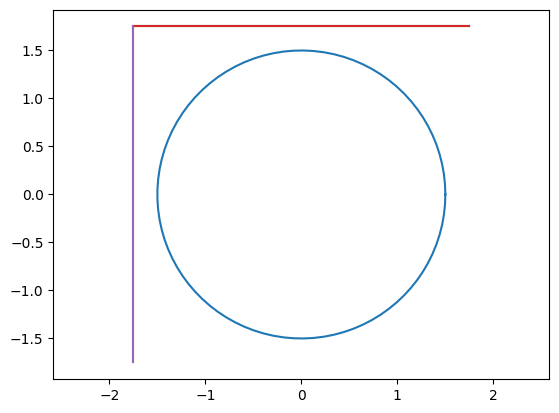

In [7]:
for shape in shape_points:
	plt.plot(shape[:, 0], shape[:, 1])
plt.axis('equal')
plt.show()